<a href="https://colab.research.google.com/github/raheldouaa/cancer-prediction/blob/main/cnn_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 binary classification problem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**imutils** A series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier

**argparse** is the “recommended command-line parsing module in the Python standard library.” It's what you use to get command line arguments into your program.


https://towardsdatascience.com/learn-enough-python-to-be-useful-argparse-e482e1764e05


In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
# Load the images directories
path = "/content/drive/MyDrive/Colab Notebooks/archive/brain_tumor_dataset"
image_paths = list(paths.list_images(path))

extract the directory name / acts as the label

resize the image size to 224×224 pixels

> Bloc en retrait



 converts images to pixel information

In [ ]:
images = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    images.append(image)
    labels.append(label)

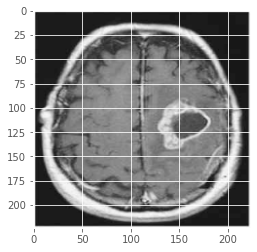

In [ ]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])

the labels are strings => apply One-hot encoding to the labels.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

normalize the images

In [ ]:
images = np.array(images) / 255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

split the dataset

In [ ]:
images.shape

(253, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

**CNN Model**

**CNN** is a deep neural network widely used for analyzing visual images

**CNN** work well for tasks like image classification and detection, image segmentation.

TensorFlow provides **ImageDataGenerator** which is used for data augmentation. 

Data Augmentation is extremely helpful in cases where the input data is very less.

So we increase the dataset size

We are using the transformations fill_mode and rotation_range to fill the out of boundary pixels with the pixel **“nearest”** to them and include a rotation of 15 degrees to the images. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode= 'nearest', rotation_range= 15)

# **Transfer learning** is about leveraging feature representations from a pre-trained model => so you don’t have to train a new model from scratch

 VGG16 state-of-the-art network model

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = VGG16(weights= 'imagenet', input_tensor= Input(shape = (224, 224, 3)), include_top= False)
base_input = base_model.input
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

use the Adam as optimizer

learning rate = 0.001

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


model = Model(inputs = base_input, outputs = base_output)
model.compile(optimizer= Adam(learning_rate= 1e-3), metrics= ['accuracy'], loss= 'binary_crossentropy')

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

hyperparameters

In [ ]:
batch_size = 8
train_steps = len(train_X) // batch_size
validation_steps = len(test_X) // batch_size
epochs = 10

In [ ]:
history = model.fit_generator(
    train_generator.flow(train_X, train_Y, batch_size= batch_size), steps_per_epoch= train_steps, validation_data = (test_X, test_Y), validation_steps= validation_steps, epochs= epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
28/28 [==============================] - 136s 5s/step - loss: 0.6976 - accuracy: 0.5982 - val_loss: 0.6338 - val_accuracy: 0.8077
Epoch 2/10
28/28 [==============================] - 125s 4s/step - loss: 0.6632 - accuracy: 0.6164 - val_loss: 0.6009 - val_accuracy: 0.7692
Epoch 3/10
28/28 [==============================] - 125s 4s/step - loss: 0.6041 - accuracy: 0.6712 - val_loss: 0.5755 - val_accuracy: 0.7308
Epoch 4/10
28/28 [==============================] - 133s 5s/step - loss: 0.5881 - accuracy: 0.7534 - val_loss: 0.5431 - val_accuracy: 0.7692
Epoch 5/10
28/28 [==============================] - 126s 4s/step - loss: 0.5619 - accuracy: 0.7443 - val_loss: 0.5226 - val_accuracy: 0.7308
Epoch 6/10
28/28 [==============================] - 125s 4s/step - loss: 0.5205 - accuracy: 0.7717 - val_loss: 0.5162 - val_accuracy: 0.8077
Epoch 7/10
28/28 [==============================] - 125s 4s/step - loss: 0.5282 - accuracy: 0.7671 - val_loss: 0.4907 - val_accuracy: 0.7308
Epoch 8/10
28

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(test_X, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(test_Y, axis= 1)

TP-FN                                                                                                        
FP TN


    True positive (TP): Target is positive and the model predicted it as positive
    False negative (FN): Target is positive and the model predicted it as negative
    False positive (FP): Target is negative and the model predicted it as positive
    True negative (TN): Target is negative and the model predicted it as negative


In [ ]:
print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))
cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       0.73      0.80      0.76        10
         yes       0.87      0.81      0.84        16

    accuracy                           0.81        26
   macro avg       0.80      0.81      0.80        26
weighted avg       0.81      0.81      0.81        26

[[ 8  2]
 [ 3 13]]


(TP + TN) / (TP + FN + FN + TN)

In [ ]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))


Accuracy: 0.8077


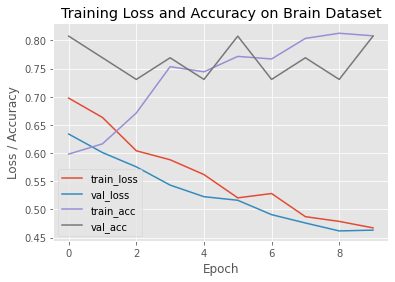

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")
plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")

In [ ]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

2022-06-26 22:30:56.651307: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://021a9a4d-7f27-46f7-9b60-e5956692a69f/assets


['finalized_model.sav']

In [ ]:
import cv2

img = []

img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/archive/no/10 no.jpg")
img = cv2.resize(img, (224, 224))
img = img.reshape(1,224,224,3)

prediction = model.predict(img)

In [ ]:
prediction


array([[1.0000000e+00, 1.6344687e-15]], dtype=float32)

In [ ]:
import os.path

if os.path.isfile('modelh5.h5') is False:
 model.save('modelh5.h5')


In [ ]:
from tensorflow.keras.models import load_model

new_module = load_model('modelh5.h5')